# Phase 3: Data Transformation
## Multi-Campus Education Data Preprocessing

This notebook performs data transformation including:
1. Scaling/Standardization of continuous features
2. Encoding categorical variables
3. Binning marks into performance bands

## Step 1: Import Libraries and Load Cleaned Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler


import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:

# Load cleaned datasets from Phase 2
students_df = pd.read_csv('Outputs/students_cleaned.csv')
courses_df = pd.read_csv('Outputs/courses_cleaned.csv')
assessments_df = pd.read_csv('Outputs/assessments_cleaned.csv')

print(f"Students: {students_df.shape}")
print(f"Courses: {courses_df.shape}")
print(f"Assessments: {assessments_df.shape}")

Students: (4500, 13)
Courses: (23719, 11)
Assessments: (56896, 13)


## Step 2: Scaling/Standardization of Continuous Features

In [3]:
print("="*70)
print("SCALING CONTINUOUS FEATURES")
print("="*70)

# Create copies for transformation
assessments_transformed = assessments_df.copy()

# Identify continuous features to scale
continuous_features = ['Attendance_Rate']

print("\nContinuous features identified for scaling:")
print(continuous_features)

SCALING CONTINUOUS FEATURES

Continuous features identified for scaling:
['Attendance_Rate']



--- Distribution Before Scaling ---


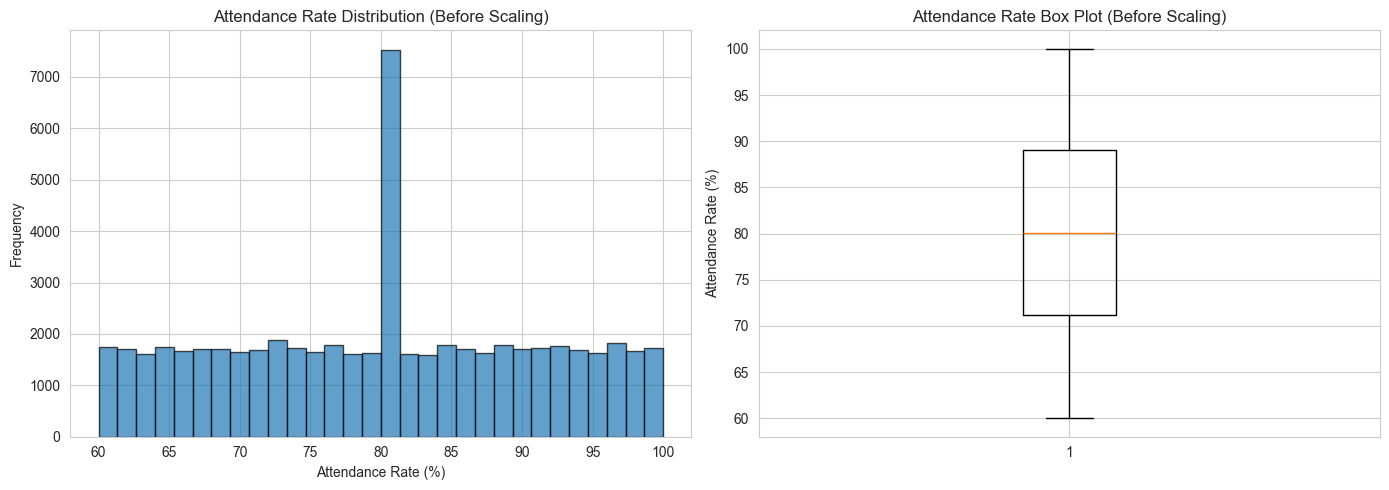


Attendance Rate Statistics (Before):
count    56896.000000
mean        80.016035
std         10.966949
min         60.000000
25%         71.200000
50%         80.007887
75%         89.000000
max        100.000000
Name: Attendance_Rate, dtype: float64


In [4]:
# Visualize before scaling
print("\n--- Distribution Before Scaling ---")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Attendance Rate distribution
axes[0].hist(assessments_transformed['Attendance_Rate'].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Attendance Rate (%)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Attendance Rate Distribution (Before Scaling)')

# Box plot
axes[1].boxplot(assessments_transformed['Attendance_Rate'].dropna(), vert=True)
axes[1].set_ylabel('Attendance Rate (%)')
axes[1].set_title('Attendance Rate Box Plot (Before Scaling)')

plt.tight_layout()
plt.show()

print("\nAttendance Rate Statistics (Before):")
print(assessments_transformed['Attendance_Rate'].describe())

In [5]:
# Apply StandardScaler (Z-score normalization)
# This will transform the data to have mean=0 and std=1
print("\n--- Applying StandardScaler ---")

scaler = StandardScaler()

# Fit and transform
assessments_transformed['Attendance_Rate_Scaled'] = scaler.fit_transform(
    assessments_transformed[['Attendance_Rate']]
)

print("# StandardScaler applied to Attendance_Rate")
print(f"  Mean: {assessments_transformed['Attendance_Rate_Scaled'].mean():.6f}")
print(f"  Std: {assessments_transformed['Attendance_Rate_Scaled'].std():.6f}")


--- Applying StandardScaler ---
# StandardScaler applied to Attendance_Rate
  Mean: -0.000000
  Std: 1.000009



--- Distribution After Scaling ---


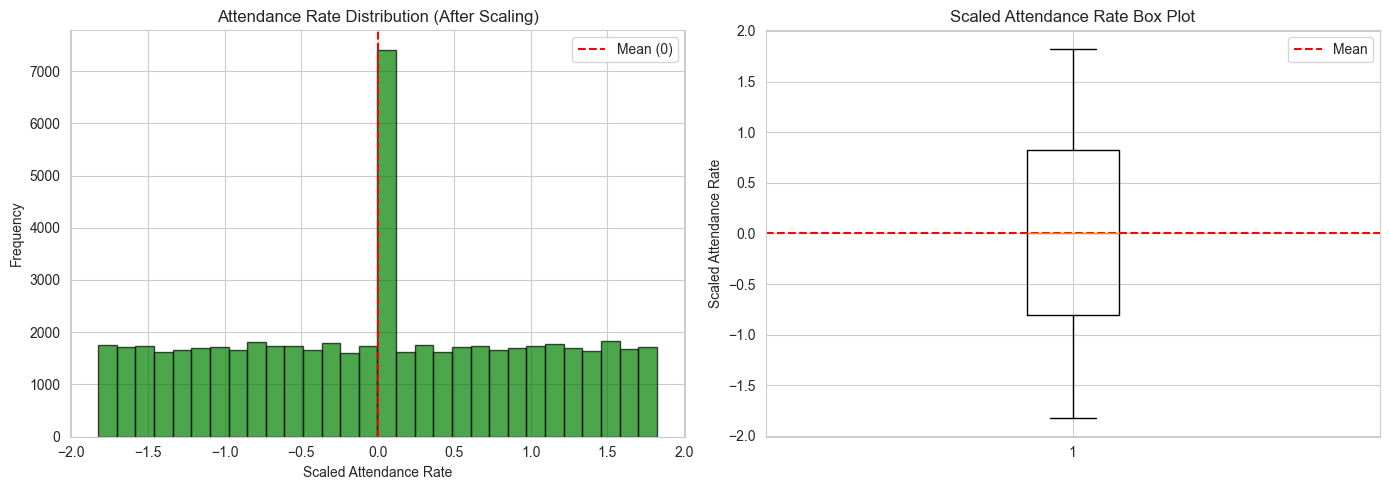


Attendance Rate Statistics (After):
count    5.689600e+04
mean    -3.309439e-16
std      1.000009e+00
min     -1.825140e+00
25%     -8.038802e-01
50%     -7.430290e-04
75%      8.191926e-01
max      1.822215e+00
Name: Attendance_Rate_Scaled, dtype: float64


In [6]:
# Visualize after scaling
print("\n--- Distribution After Scaling ---")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scaled Attendance Rate distribution
axes[0].hist(assessments_transformed['Attendance_Rate_Scaled'].dropna(), bins=30, 
             edgecolor='black', alpha=0.7, color='green')
axes[0].set_xlabel('Scaled Attendance Rate')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Attendance Rate Distribution (After Scaling)')
axes[0].axvline(x=0, color='r', linestyle='--', label='Mean (0)')
axes[0].legend()

# Box plot
axes[1].boxplot(assessments_transformed['Attendance_Rate_Scaled'].dropna(), vert=True)
axes[1].set_ylabel('Scaled Attendance Rate')
axes[1].set_title('Scaled Attendance Rate Box Plot')
axes[1].axhline(y=0, color='r', linestyle='--', label='Mean')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\nAttendance Rate Statistics (After):")
print(assessments_transformed['Attendance_Rate_Scaled'].describe())

## Step 3: Encoding Categorical Variables

In [7]:
print("\n" + "="*70)
print("ONE-HOT ENCODING CATEGORICAL VARIABLES")
print("="*70)

# Identify categorical variables to encode
categorical_features = ['Campus_Name', 'Assessment_Type']

print("\nCategorical features to encode:")
for feature in categorical_features:
    print(f"  {feature}: {assessments_transformed[feature].nunique()} unique values")
    print(f"    Values: {assessments_transformed[feature].unique().tolist()}")


ONE-HOT ENCODING CATEGORICAL VARIABLES

Categorical features to encode:
  Campus_Name: 3 unique values
    Values: ['Rwanda Polytechnic Musanze', 'Rwanda Polytechnic Huye', 'Rwanda Polytechnic Kigali']
  Assessment_Type: 5 unique values
    Values: ['Final Project', 'Assignment', 'Cat', 'Quiz', 'Final Exam']


In [8]:
# One-hot encode Campus_Name
print("\n--- Encoding Campus_Name ---")

campus_encoded = pd.get_dummies(assessments_transformed['Campus_Name'], prefix='Campus')
print(f"# Created {len(campus_encoded.columns)} campus indicator columns:")
print(f"  {campus_encoded.columns.tolist()}")

# Add to dataset
assessments_transformed = pd.concat([assessments_transformed, campus_encoded], axis=1)

print("\nSample of encoded campus variables:")
print(assessments_transformed[['Campus_Name'] + campus_encoded.columns.tolist()].head())


--- Encoding Campus_Name ---
# Created 3 campus indicator columns:
  ['Campus_Rwanda Polytechnic Huye', 'Campus_Rwanda Polytechnic Kigali', 'Campus_Rwanda Polytechnic Musanze']

Sample of encoded campus variables:
                  Campus_Name  Campus_Rwanda Polytechnic Huye  \
0  Rwanda Polytechnic Musanze                           False   
1  Rwanda Polytechnic Musanze                           False   
2     Rwanda Polytechnic Huye                            True   
3  Rwanda Polytechnic Musanze                           False   
4  Rwanda Polytechnic Musanze                           False   

   Campus_Rwanda Polytechnic Kigali  Campus_Rwanda Polytechnic Musanze  
0                             False                               True  
1                             False                               True  
2                             False                              False  
3                             False                               True  
4                            

In [9]:
# One-hot encode Assessment_Type
print("\n--- Encoding Assessment_Type ---")

assessment_type_encoded = pd.get_dummies(assessments_transformed['Assessment_Type'], prefix='Assessment')
print(f"# Created {len(assessment_type_encoded.columns)} assessment type indicator columns:")
print(f"  {assessment_type_encoded.columns.tolist()}")

# Add to dataset
assessments_transformed = pd.concat([assessments_transformed, assessment_type_encoded], axis=1)

print("\nSample of encoded assessment type variables:")
print(assessments_transformed[['Assessment_Type'] + assessment_type_encoded.columns.tolist()].head())


--- Encoding Assessment_Type ---
# Created 5 assessment type indicator columns:
  ['Assessment_Assignment', 'Assessment_Cat', 'Assessment_Final Exam', 'Assessment_Final Project', 'Assessment_Quiz']

Sample of encoded assessment type variables:
  Assessment_Type  Assessment_Assignment  Assessment_Cat  \
0   Final Project                  False           False   
1      Assignment                   True           False   
2             Cat                  False            True   
3             Cat                  False            True   
4            Quiz                  False           False   

   Assessment_Final Exam  Assessment_Final Project  Assessment_Quiz  
0                  False                      True            False  
1                  False                     False            False  
2                  False                     False            False  
3                  False                     False            False  
4                  False                    

In [10]:
# Encode Program in students dataset
print("\n--- Encoding Program in Students Dataset ---")

students_transformed = students_df.copy()

program_encoded = pd.get_dummies(students_transformed['Program'], prefix='Program')
print(f"# Created {len(program_encoded.columns)} program indicator columns:")
print(f"  {program_encoded.columns.tolist()}")

students_transformed = pd.concat([students_transformed, program_encoded], axis=1)

print("\nProgram encoding summary:")
for col in program_encoded.columns:
    print(f"  {col}: {program_encoded[col].sum()} students")


--- Encoding Program in Students Dataset ---
# Created 6 program indicator columns:
  ['Program_Civil Engineering', 'Program_Computer Science', 'Program_Electronics', 'Program_Information Technology', 'Program_Mechanical Engineering', 'Program_Software Engineering']

Program encoding summary:
  Program_Civil Engineering: 760 students
  Program_Computer Science: 727 students
  Program_Electronics: 731 students
  Program_Information Technology: 771 students
  Program_Mechanical Engineering: 770 students
  Program_Software Engineering: 741 students


## Step 4: Binning - Performance Bands

In [11]:
print("\n" + "="*70)
print("BINNING MARKS INTO PERFORMANCE BANDS")
print("="*70)

# Define performance bands
# Fail: 0-39, Pass: 40-49, Credit: 50-69, Distinction: 70-100

def assign_performance_band(mark):
    if pd.isna(mark):
        return 'Unknown'
    elif mark < 40:
        return 'Fail'
    elif mark < 50:
        return 'Pass'
    elif mark < 70:
        return 'Credit'
    else:
        return 'Distinction'

assessments_transformed['Performance_Band'] = assessments_transformed['Mark'].apply(assign_performance_band)

print("# Performance bands created based on marks:")
print("  Fail: 0-39")
print("  Pass: 40-49")
print("  Credit: 50-69")
print("  Distinction: 70-100")


BINNING MARKS INTO PERFORMANCE BANDS
# Performance bands created based on marks:
  Fail: 0-39
  Pass: 40-49
  Credit: 50-69
  Distinction: 70-100



--- Performance Band Distribution ---

Count by Performance Band:
Performance_Band
Credit         19710
Distinction    23714
Fail            6508
Pass            6964
Name: count, dtype: int64


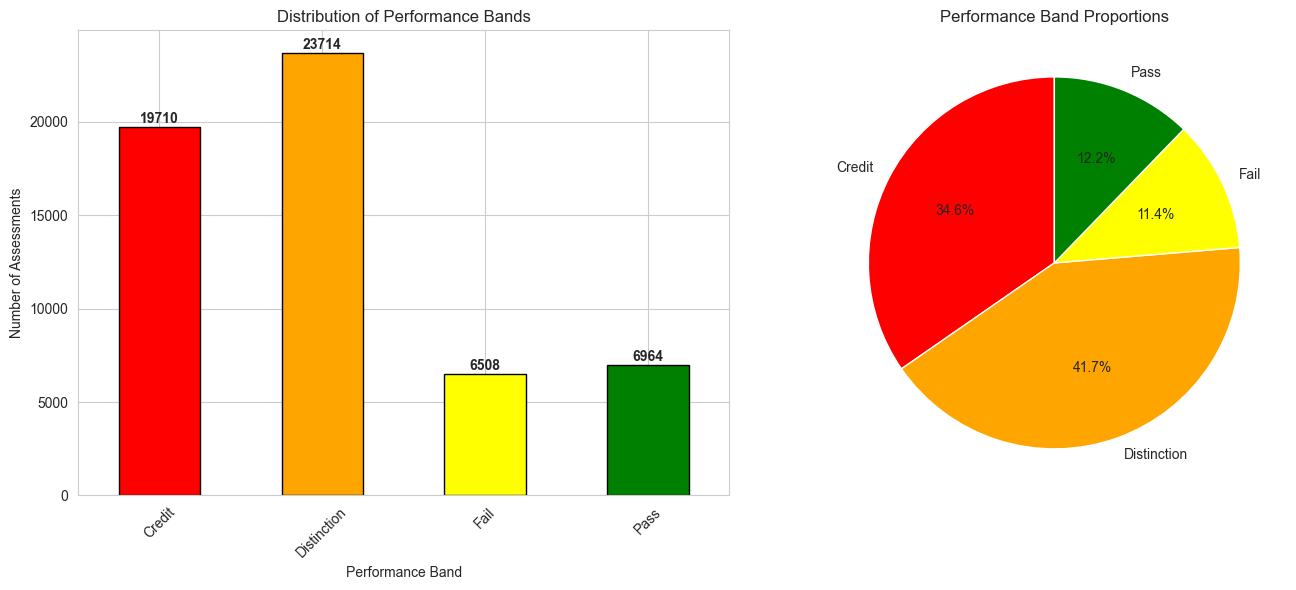

In [12]:
# Visualize performance band distribution
print("\n--- Performance Band Distribution ---")

band_counts = assessments_transformed['Performance_Band'].value_counts().sort_index()
print("\nCount by Performance Band:")
print(band_counts)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart
band_counts.plot(kind='bar', ax=axes[0], color=['red', 'orange', 'yellow', 'green'], edgecolor='black')
axes[0].set_xlabel('Performance Band')
axes[0].set_ylabel('Number of Assessments')
axes[0].set_title('Distribution of Performance Bands')
axes[0].tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, v in enumerate(band_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['red', 'orange', 'yellow', 'green']
band_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_ylabel('')
axes[1].set_title('Performance Band Proportions')

plt.tight_layout()
plt.show()

In [13]:
# Encode performance bands as ordinal values
print("\n--- Encoding Performance Bands as Ordinal ---")

performance_mapping = {
    'Fail': 1,
    'Pass': 2,
    'Credit': 3,
    'Distinction': 4,
    'Unknown': 0
}

assessments_transformed['Performance_Band_Numeric'] = assessments_transformed['Performance_Band'].map(performance_mapping)

print("# Performance bands encoded as ordinal values:")
for band, value in performance_mapping.items():
    print(f"  {band}: {value}")

print("\nSample data:")
print(assessments_transformed[['Mark', 'Performance_Band', 'Performance_Band_Numeric']].head(10))


--- Encoding Performance Bands as Ordinal ---
# Performance bands encoded as ordinal values:
  Fail: 1
  Pass: 2
  Credit: 3
  Distinction: 4
  Unknown: 0

Sample data:
   Mark Performance_Band  Performance_Band_Numeric
0  65.0           Credit                         3
1  65.0           Credit                         3
2  65.0           Credit                         3
3  65.0           Credit                         3
4  65.0           Credit                         3
5  65.0           Credit                         3
6  65.0           Credit                         3
7  65.0           Credit                         3
8  65.0           Credit                         3
9  65.0           Credit                         3


In [14]:
# Additional binning: Attendance categories
print("\n--- Binning Attendance Rates ---")

def assign_attendance_category(rate):
    if pd.isna(rate):
        return 'Unknown'
    elif rate < 50:
        return 'Poor'
    elif rate < 70:
        return 'Fair'
    elif rate < 85:
        return 'Good'
    else:
        return 'Excellent'

assessments_transformed['Attendance_Category'] = assessments_transformed['Attendance_Rate'].apply(assign_attendance_category)

print("# Attendance categories created:")
print("  Poor: < 50%")
print("  Fair: 50-69%")
print("  Good: 70-84%")
print("  Excellent: >= 85%")

print("\nAttendance Category Distribution:")
print(assessments_transformed['Attendance_Category'].value_counts().sort_index())


--- Binning Attendance Rates ---
# Attendance categories created:
  Poor: < 50%
  Fair: 50-69%
  Good: 70-84%
  Excellent: >= 85%

Attendance Category Distribution:
Attendance_Category
Excellent    19352
Fair         12653
Good         24891
Name: count, dtype: int64


## Step 5: Transformation Summary

In [15]:
print("="*70)
print("TRANSFORMATION SUMMARY")
print("="*70)

print("\n1. SCALING:")
print(f"   - Attendance_Rate scaled using StandardScaler")
print(f"   - New column: Attendance_Rate_Scaled (mean=0, std=1)")

print("\n2. ONE-HOT ENCODING:")
print(f"   - Campus_Name → {len(campus_encoded.columns)} indicator columns")
print(f"   - Assessment_Type → {len(assessment_type_encoded.columns)} indicator columns")
print(f"   - Program → {len(program_encoded.columns)} indicator columns")

print("\n3. BINNING:")
print(f"   - Performance_Band: 4 categories (Fail, Pass, Credit, Distinction)")
print(f"   - Performance_Band_Numeric: Ordinal encoding (1-4)")
print(f"   - Attendance_Category: 4 categories (Poor, Fair, Good, Excellent)")

print(f"\n4. DATASET SHAPES:")
print(f"   - Students (transformed): {students_transformed.shape}")
print(f"   - Courses (no transformation): {courses_df.shape}")
print(f"   - Assessments (transformed): {assessments_transformed.shape}")

print(f"\n5. NEW FEATURES CREATED:")
new_features = [
    'Attendance_Rate_Scaled',
    'Performance_Band',
    'Performance_Band_Numeric',
    'Attendance_Category'
] + campus_encoded.columns.tolist() + assessment_type_encoded.columns.tolist()

print(f"   Total: {len(new_features)} new features")
print(f"   Features: {new_features[:10]}...")

TRANSFORMATION SUMMARY

1. SCALING:
   - Attendance_Rate scaled using StandardScaler
   - New column: Attendance_Rate_Scaled (mean=0, std=1)

2. ONE-HOT ENCODING:
   - Campus_Name → 3 indicator columns
   - Assessment_Type → 5 indicator columns
   - Program → 6 indicator columns

3. BINNING:
   - Performance_Band: 4 categories (Fail, Pass, Credit, Distinction)
   - Performance_Band_Numeric: Ordinal encoding (1-4)
   - Attendance_Category: 4 categories (Poor, Fair, Good, Excellent)

4. DATASET SHAPES:
   - Students (transformed): (4500, 19)
   - Courses (no transformation): (23719, 11)
   - Assessments (transformed): (56896, 25)

5. NEW FEATURES CREATED:
   Total: 12 new features
   Features: ['Attendance_Rate_Scaled', 'Performance_Band', 'Performance_Band_Numeric', 'Attendance_Category', 'Campus_Rwanda Polytechnic Huye', 'Campus_Rwanda Polytechnic Kigali', 'Campus_Rwanda Polytechnic Musanze', 'Assessment_Assignment', 'Assessment_Cat', 'Assessment_Final Exam']...


## Step 6: Save Transformed Datasets

In [16]:
# Save transformed datasets
students_transformed.to_csv('Outputs/students_transformed.csv', index=False)
courses_df.to_csv('Outputs/courses_transformed.csv', index=False)
assessments_transformed.to_csv('Outputs/silver_transformed.csv', index=False)

print("="*70)
print("PHASE 3 COMPLETED SUCCESSFULLY")
print("="*70)
print("\nTransformed datasets saved:")
print("   Outputs/students_transformed.csv")
print("   Outputs/courses_transformed.csv")
print("   Outputs/silver_transformed.csv (assessments)")
print("\nNext Step: Run 04_integration.ipynb")

PHASE 3 COMPLETED SUCCESSFULLY

Transformed datasets saved:
   Outputs/students_transformed.csv
   Outputs/courses_transformed.csv
   Outputs/silver_transformed.csv (assessments)

Next Step: Run 04_integration.ipynb
